# China's One Child Policy

At what point are there too many men?


In [165]:
%matplotlib inline

from modsim import *

In [166]:
import pandas as pd
data = pd.read_csv("C:/Users/rwon/Documents/ModSim/Lots_o_data.csv",  index_col='Year', low_memory=False) / 1e8
data

,Population
Year,
1965,7.15185
1966,7.35400
1967,7.54550
1968,7.74510
1969,7.96025
1970,8.18315
1971,8.41105
1972,8.62030
1973,8.81940


In [167]:
system = System(death_rate = 7.06/1000,
                probOfBeingBoy = 0.7,
                old_pop0 = 4.906175,
                young_pop0 = 4.906175,
                youngMale0 = 2.4530875,
                youngFemale0 = 2.4530875,
                oldMale0 = 2.4530875,
                oldFemale0 = 2.4530875,
                fertilityRate = 1.006,
                maturationRate = .002) 

systemSingle = System(t0 = 1965, 
                      t_end = 2005)
system

,value
death_rate,0.007060
probOfBeingBoy,0.700000
old_pop0,4.906175
young_pop0,4.906175
youngMale0,2.453088
youngFemale0,2.453088
oldMale0,2.453088
oldFemale0,2.453088
fertilityRate,1.006000
maturationRate,0.002000


In [168]:
systemSingle

,value
t0,1965
t_end,2005


In [169]:
def run_simulation(system):
    youngMale = TimeSeries()
    youngFemale = TimeSeries()
    youngTotal = TimeSeries()
    oldMale = TimeSeries()
    oldFemale = TimeSeries()
    oldTotal = TimeSeries()
    population = TimeSeries()

    oldTotal[systemSingle.t0] = system.old_pop0
    youngTotal[systemSingle.t0] = system.young_pop0
    youngMale[systemSingle.t0] = system.youngMale0
    youngFemale[systemSingle.t0] = system.youngFemale0
    oldMale[systemSingle.t0] = system.oldMale0
    oldFemale[systemSingle.t0] = system.oldFemale0
    population[systemSingle.t0] = system.old_pop0 + system.young_pop0
    
    
    for t in range(systemSingle.t0, systemSingle.t_end):

            babiesNextYear = oldFemale[t] * system.fertilityRate
            
            maturationsGirls = youngFemale[t] * system.maturationRate
            maturationsBoys = youngMale[t] * system.maturationRate
            
            youngMale[t+1] = babiesNextYear*system.probOfBeingBoy + youngMale[t]  - maturationsBoys
            youngFemale[t+1] = babiesNextYear - youngMale[t+1] + youngFemale[t] - maturationsGirls
            
            if youngMale[t+1] < 0:
                youngMale[t+1] = 0
            if youngFemale[t+1] < 0:
                youngFemale[t+1] = 0
                
            youngTotal[t+1] = youngMale[t+1] + youngFemale[t+1] + youngTotal[t]
            
            deaths = system.death_rate * oldTotal[t]
            genderDeath = deaths / 2 
            
            oldFemale[t+1] = maturationsGirls + oldFemale[t] - genderDeath
            oldMale[t+1] = maturationsBoys + oldMale[t] - genderDeath
                        
            if oldMale[t+1] < 0:
                oldMale[t+1] = 0
            if oldFemale[t+1] < 0:
                oldFemale[t+1] = 0
                
            oldTotal[t+1] = oldFemale[t+1] + oldMale[t+1]
           
            population[t+1] = youngTotal[t+1] + oldTotal[t+1]
            if population [t+1] < 0:
                population[t+1] = 0
            

    system.population = population
    system.youngMale = youngMale
    system.youngFemale = youngFemale
    system.youngTotal = youngTotal
    system.oldMale = oldMale
    system.oldFemale = oldFemale
    system.oldTotal = oldTotal


Test your changes in `run_simulation`:

In [170]:
run_simulation(system)
system.youngFemale
#system.population

,value
1965,2.453088
1966,0.740342
1967,0.000000
1968,0.000000
1969,0.000000
1970,0.000000
1971,0.000000
1972,0.000000
1973,0.000000
1974,0.000000


In [171]:
def plot_results(system, title=None):
    """Plot the estimates and the model.
    
    system: System object with `results`
    """
    newfig()
    plot(data, '--', color='green', label='China Population')
    plot(system.population, 'bo-', label='population')
    decorate(xlabel='Time (years)', 
             ylabel='Population of China (in millions)',
             title=title)


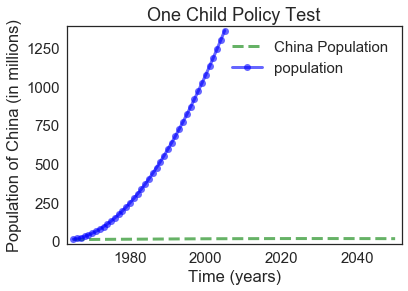

In [172]:
plot_results(system, title='One Child Policy Test')

In [173]:
def plot_results(system, title=None):
    """Plot the estimates and the model.
    
    system: System object with `results`
    """
    newfig()
    plot(data, '--', color='green', label='China Population')
    decorate(xlabel='Time (years)', 
             ylabel='Population of China (in millions)',
             title=title)

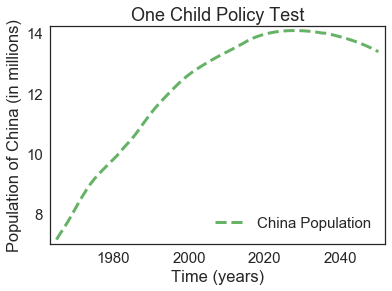

In [175]:
plot_results(data, title='One Child Policy Test')